## Imports

In [1]:
from functools import partial
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd

from models.sphericaldeconvolution.spherical_deconvolution import spherical_deconvolution_fit
from models.sphericaldeconvolution.fibre_response_function import simple_fibre_response_function, diffusion_tensor_response_function
from dataloader.load_dt_simulated import load_dt_simulated_multiple_populations
from dataloader.loadhcp import load_hcp
from preprocessing.data_augmentation import extend_dataset_with_origin_reflections
from preprocessing.data_transformations import convert_coords_from_cartesian_to_spherical
from visualization.spherical_functions_visualisation import get_spherical_function_values_from_spherical_expansion
from preprocessing.data_cleaning import remove_b_0_measurements

## Load data

In [2]:
bvals, qhat, dwis = load_dt_simulated_multiple_populations(number_of_data_points=90, 
                                                           b_value=1000,
                                                           b_0_signal=3000,
                                                           include_b_0=False,
                                                           signal_to_noise_ratio=0.01,
                                                           eigenvalues=[(0.003, 0.0002, 0.0002),(0.0002, 0.003, 0.0002)],
                                                           eigenvectors=[None,None],
                                                           fractions=[0.5,0.5],
                                                           noise_type='rician',
                                                           noise_generator_seed=100,
                                                           gradient_generator_seed=100)

bvals2, qhat2, dwis2 = load_dt_simulated_multiple_populations(number_of_data_points=90, 
                                                           b_value=1000,
                                                           b_0_signal=3000,
                                                           include_b_0=False,
                                                           signal_to_noise_ratio=30,
                                                           eigenvalues=[(0.003, 0.0002, 0.0002),(0.0002, 0.003, 0.0002)],
                                                           eigenvectors=[None,None],
                                                           fractions=[0.5,0.5],
                                                           noise_type='none',
                                                           noise_generator_seed=1,
                                                           gradient_generator_seed=1)

1288.1206107727066 -115.39694668421544
1276.9950817860026 79.17681150034491
1001.9222285848858 -89.82838149927409
879.8894585446683 72.75760286187096
1435.8340999351265 78.53832185616693
861.7019019831495 226.017443185027
1229.1157339273277 17.129334727917694
1291.672590207301 -133.3403473005783
1413.1201254790897 -68.91031012913686
700.0153520323005 72.01692607962411
1321.4906472649914 -91.1935289405128
1549.2875458032136 -21.55577112973765
1254.0245053197052 152.804208329703
1216.0899887961175 171.96307214346598
1301.1791435178163 27.14692668625844
1587.9377340715803 5.144483225038584
1414.012088877494 33.98027338101792
1428.1115130086523 25.112765188201593
1220.516692958543 -81.53574875923505
1528.96471174743 -56.26294260087889
1451.0759745959292 38.11017850688086
1141.0729160279757 14.342768745035073
1493.6037456236893 23.06909115874214
1122.9798653037801 113.69117100970834
1477.1415365920157 182.10895523697286
1947.4208114277167 179.63405505475112
730.0785823116839 -108.8389303571

In [2]:
bvals, qhat, dwis = load_hcp()

print(dwis[:,100,75,71])

bvals, qhat, dwis = remove_b_0_measurements(bvals, qhat, dwis)
bvals, qhat, dwis = extend_dataset_with_origin_reflections(bvals, qhat, dwis)
thetas, phis = convert_coords_from_cartesian_to_spherical(qhat)
voxel = dwis[:,100,75,71]
voxel

[3365.545   1120.1832  1746.1273  1994.284   2355.8635  1141.3386
 3481.4504  1319.1646  1692.9148  1304.5999  1776.4893  1850.2423
 3710.0608  1736.5635  1959.4779  1536.9711  1241.8085  2115.1946
 3423.399   2048.0872  1764.5569  2015.017   1919.6414  1652.7312
 3329.1646  1700.7474  1147.5239  1885.3145  1635.8328  1400.7739
 3804.6946  1456.9565  1014.1146  2092.2744  1850.6425  1398.3287
 3641.1184  1888.2919  1602.9725  1717.0581  1500.4734  1317.569
 3675.7515  1835.3228  2104.8643  1655.3278  1379.6798  1750.504
 3457.9714  1587.1937  1978.541    959.55365 2120.06    1500.2799
 3768.8616  1867.4877  1789.7793  1671.7902  1530.8884  1508.7181
 3490.988   1415.8063  1082.3871  2552.8623  1864.1335  2047.2896
 3660.995   1640.3965  1325.0327  1245.0833  1847.978   1652.5964
 3431.1384  1982.6775  1707.3073  1818.8319  1844.2772  1291.6127
 2995.5625  1794.27    1594.973   2286.7366  1277.6061  1484.5334
 3683.2185  2290.4087  1051.1519  1905.5702  1946.6218  1586.5054
 3481.7346  

array([1120.1832 , 1746.1273 , 1994.284  , 2355.8635 , 1141.3386 ,
       1319.1646 , 1692.9148 , 1304.5999 , 1776.4893 , 1850.2423 ,
       1736.5635 , 1959.4779 , 1536.9711 , 1241.8085 , 2115.1946 ,
       2048.0872 , 1764.5569 , 2015.017  , 1919.6414 , 1652.7312 ,
       1700.7474 , 1147.5239 , 1885.3145 , 1635.8328 , 1400.7739 ,
       1456.9565 , 1014.1146 , 2092.2744 , 1850.6425 , 1398.3287 ,
       1888.2919 , 1602.9725 , 1717.0581 , 1500.4734 , 1317.569  ,
       1835.3228 , 2104.8643 , 1655.3278 , 1379.6798 , 1750.504  ,
       1587.1937 , 1978.541  ,  959.55365, 2120.06   , 1500.2799 ,
       1867.4877 , 1789.7793 , 1671.7902 , 1530.8884 , 1508.7181 ,
       1415.8063 , 1082.3871 , 2552.8623 , 1864.1335 , 2047.2896 ,
       1640.3965 , 1325.0327 , 1245.0833 , 1847.978  , 1652.5964 ,
       1982.6775 , 1707.3073 , 1818.8319 , 1844.2772 , 1291.6127 ,
       1794.27   , 1594.973  , 2286.7366 , 1277.6061 , 1484.5334 ,
       2290.4087 , 1051.1519 , 1905.5702 , 1946.6218 , 1586.50

## Pre-processing

In [3]:
bvals, qhat, dwis = extend_dataset_with_origin_reflections(bvals, qhat, dwis)

thetas, phis = convert_coords_from_cartesian_to_spherical(qhat)

voxel = dwis

print(voxel)

[1172.72366409 1356.17189329  912.09384709  952.64706141 1514.37242179
 1087.71934517 1246.24506866 1158.33224291 1344.20981535  772.03227811
 1230.29711832 1527.73177467 1406.82871365 1388.05306094 1328.3260702
 1593.0822173  1447.99236226 1453.2242782  1138.9809442  1472.70176915
 1489.1861531  1155.41568477 1516.67283678 1236.67103631 1659.25049183
 2127.05486648  621.23965195  843.0840884  1238.40571736 1530.33754993
 1259.82785715 1433.88176388 1061.08170256  567.84685386 1444.18968155
 2110.66832782  936.13335265 2344.47445784 1988.2999386   794.40347848
 1314.48729121 1946.83359891 1511.64052313 1394.923907   2420.09100498
 1284.42634447 1224.91580995  629.77827538 1276.55373219 1286.85337855
 1904.77757949 2320.2383069  1328.02600932  996.99841661 1156.52956742
  913.33388862 1146.50733129 1979.37097251 1267.62372503 1099.51637656
 1409.27054847  615.87694602  704.36681384  970.73158073  744.85177751
  701.5228024  1282.6484637  1471.14187649 1556.83169062  999.72463941
  801.3

# Spherical deconvolution

Even though the diffusion tensor model was among the first widely adopted models, it has major limitations, i.e. it is unable to resolve complex fibre configurations such as fibre crossings or (in a tractography context) track fibres through regions of crossing fibres. The diffusion tensor only shows the overall diffusion in a voxel. The issue of crossing fibres was first disregarded since it was believed that only a few problematic regions (like centrum semiovale and pons) were affected. However, further studies have shown that fibre crossings are of common occurrence in the human brain. According to the estimates, 70-90% of white matter contains fibre crossings of at least two fibre populations$^{[1,2,3,4]}$. Therefore spherical deconvolution (SD) was adopted to model multiple fibre orientations in a voxel. 

The main assumption of SD is that the diffusion properties of white matter fibres are the same across all brain regions (this behaviour is modelled by the "fibre response function" see below), and thus the changes in detected signal are only caused by partial volume effects.

## Mixture models

Mixture models estimate the orientation of fibres and their volume fractions by modelling the signal that would be captured for a single population of fibres. The actual signal coming from a voxel is thus assumed to be composed of signals that would have been measured for each population (compartment) in isolation. Water exachge between compartments is not assumed to be negligible. The diffusion due to cerebrospinal fluid (CSF) can be modelled by an isotropic compartment.

## Fibre response function

Fibre response function (FRF) models the signal coming from a single fibre population. It can be estimated from the diffusion tensor model by fitting the DT model in a region that is known to have high anisotropy (like corpus callosum) and thus the voxel is likely to contain only one dominant fibre orientation.

FRF is axially symmetric (only depends on collatitude $\theta$) i.e. $R(\theta)=R(\theta,\phi)$.

## Spherical deconvolution

As mentioned above the core concept behind spherical deconvolution is that the voxel signal can be expressed as a weighted sum of one or more fibre populations. These populations are assumed to be identical in terms of their signal response i.e. the signal is attenuated along the fibres and preserved across the fibres. Thus the resulting voxel signal depends only the orientation of the fibres and the fraction of volume they occupy in the voxel. Equivalently the signal can also be expressed as a convolution over the sphere of an fODF with an FRF. See figure below:

![DODF_VS_FODF](./figures/sd_approach.png)

In order to infer fODF the problem is inverted and fODF is estimated from the measured signal given the FRF. The advantage of SD is that the number of fibre populations does not need to be estimated in advance as opposed to other approaches like multiple diffusion tensor model $^{[6]}$.

More formally, SD is a mixture model for estimation of the continuous fibre orientation distribution function (fODF) where the fODF is parametrized by the SH coefficients. And the signal can be written as (Eq 1):

$$S(\theta, \phi)=\sum_{i}^{N}f_{i}\hat{A}_iR(\theta)$$

where $f_{i}$ is the volume fraction of the *i*-th fibre population, $\hat{A}_{i}$ is the operator that rotates the axially symmetric FRF $R(\theta)$ in the direction of the *i*-th fibre population i.e. $(\theta_{i}, \phi_{i})$ and $N$ is the number of distinct fibre populations. Equivalently the signal can be written as a convolution over a unit sphere of the FRF with the fODF $F$ (Eq 2):

$$S(\theta, \phi)=F \ast  R (\theta,\phi) \equiv S(\mathbf{\hat{q}})=\int_{S^{2}}^{}F(\mathbf{\hat{x}})R(\mathbf{\hat{q}};\mathbf{\hat{x}})d\mathbf{\hat{x}}$$

Where $\mathbf{\hat{q}}$ is the gradient orientation in Cartesian coordinates instead of spherical coordinates $(\theta,\phi)$, $\mathbf{\hat{x}}$ denotes orientation of the fibre population in Cartesian coordinates and $R(\mathbf{\hat{q}};\mathbf{\hat{x}})$ is the FRF aligned (rotated) with the direction of $\mathbf{\hat{x}}$ measured under gradient $\mathbf{\hat{q}}$.

The fODF represents a fraction of fibres going in a direction $(\theta, \phi)$. Now let a voxel contain $N$ distinct fibre populations with different orientations then fODF can be defined as a weighted sum of $N$ Dirac delta functions pointing in the way of the fibre populations where the weights are the volume fractions of the fibre populations:

$$F(\theta, \phi) = \sum_{i}^{N}f_{i}\delta_{\theta_{i},\phi_{i}}(\theta,\phi)$$

where $\delta_{\theta_{i},\phi_{i}}(\theta,\phi)$ is the Dirac delta function in spherical coordinates centered at the direction of the *i*-th fibre population and is therefore defined as:

$$\delta_{\theta_{i},\phi_{i}}(\theta,\phi)=\delta(\mathbf{r}-\mathbf{r_0})=\frac{1}{sin\theta}\delta(\theta - \theta_{0})\delta(\phi - \phi_{0})$$

where $\mathbf{r}$ is the vector of spherical coordinates $(\theta,\phi)$ and $\mathbf{r_{0}}$ is the vector of spherical coordinates $(\theta_{0},\phi_{0})$ where the Dirac delta function is centered.

If FRF $R(\theta)$ is known then the fODF can be computed by deconvolving $R(\theta)$ from the signal $S(\theta, \phi)$.

In [4]:
fibre_response_function_partial = partial(diffusion_tensor_response_function,
                                          b_value=1000,
                                          diffusion_tensor_eigenvalues=(0.003, 0.0002, 0.0002),
                                          b_0_signal=3000)

In [5]:
fODF_coefficients = spherical_deconvolution_fit(fibre_response_function=fibre_response_function_partial,
                                                measurements=voxel,
                                                qhat=qhat,
                                                b_value=1000,
                                                max_degree=8,
                                                number_of_samples_of_fibre_response_function=1000)

In [6]:
fODF_coefficients

array([ 2.83847412e-01,  5.72898380e-03, -1.70330184e-02, -3.13904977e-01,
       -5.88596092e-04, -2.76327206e-03,  1.97214173e-02,  2.25716080e-03,
       -8.92837807e-03, -3.09169312e-02,  3.99712213e-01,  5.75345705e-04,
       -6.98034413e-02, -1.57228798e-02,  6.76185475e-01,  1.95582013e-01,
       -1.43093992e-01,  2.01839913e-01,  6.55278655e-02,  1.07918343e-01,
        4.08559986e-02, -3.16467612e-01, -3.47449989e-01,  1.23751866e-01,
       -5.85855828e-02, -5.74705100e-01, -6.23478284e-02,  9.55225652e-02,
       -4.39044249e-01, -4.14682772e-02,  1.16777185e+00,  1.42729021e-01,
        5.41277947e-01, -5.72014245e-01,  1.34968984e-01,  9.31759056e-01,
        5.59496777e-01, -1.82585090e-01, -6.87915452e-01,  4.18675409e-01,
        4.19973146e-01, -9.18555397e-01, -6.07077371e-01,  6.07779521e-02,
       -1.01039886e+00])

## Plot predicted fODF

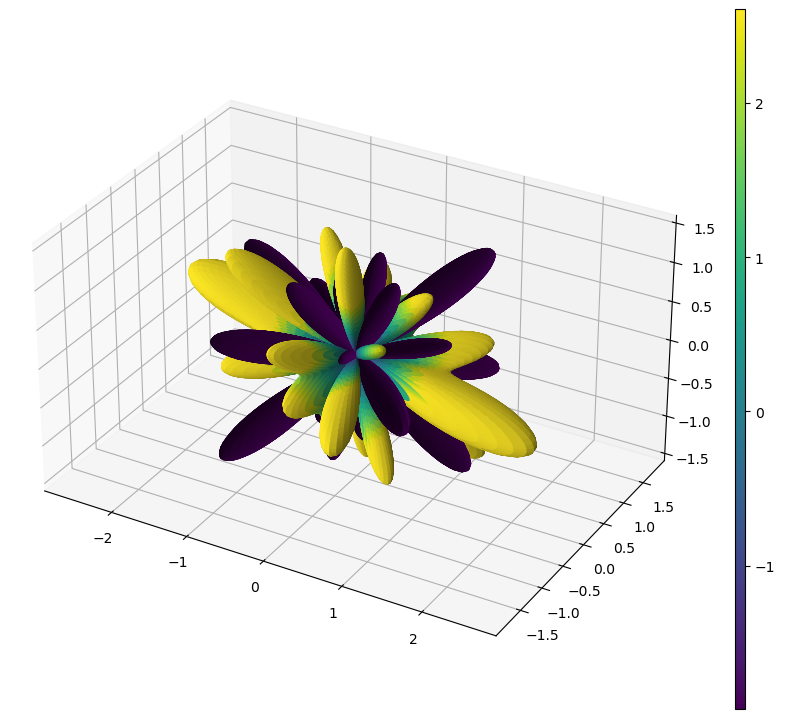

In [7]:
#%matplotlib qt

x, y, z, fcolors = get_spherical_function_values_from_spherical_expansion(fODF_coefficients,max_degree=8,resolution=200,min_value=None,max_value=None, normalize=False)

x = x * fcolors
y = y * fcolors
z = z * fcolors

fig = plt.figure(figsize=(10,10))

cmap = plt.cm.viridis
normalization = Normalize(vmin=np.min(fcolors), vmax=np.max(fcolors))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalization)

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=plt.cm.viridis(fcolors), shade=True)
#ax.set_axis_off()
plt.gca().set_aspect('equal')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sm, ax=[ax], cax=cbar_ax)

plt.show()

## Distribution of fODF values

(array([ 6375., 17301., 13415.,   654.,   525.,   417.,   374.,   350.,
          302.,   287.]),
 array([-0.38796635, -0.16138845,  0.06518945,  0.29176735,  0.51834525,
         0.74492315,  0.97150105,  1.19807896,  1.42465686,  1.65123476,
         1.87781266]),
 <BarContainer object of 10 artists>)

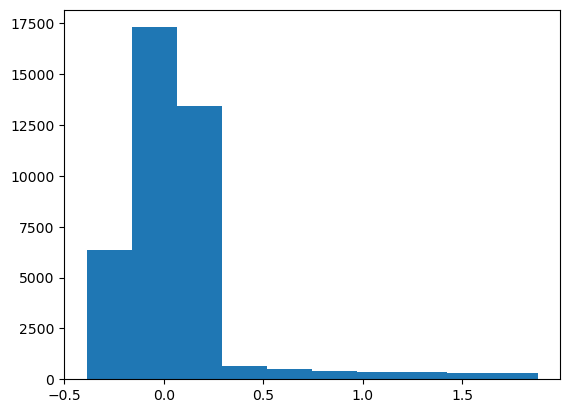

In [8]:
plt.hist(fcolors.flatten())

## Model evaluation

In [9]:
SNRs = [30, 10, 0.1, 0.05, 0.01]
names = ['30','10','01','005','001']
numbers_of_populations = [1, 2, 3]

MSEs = []

i = 0

for SNR in SNRs:
    for number_of_populations in numbers_of_populations:
        path = './data/dt_simulated_snr_'+names[i]+'/'+str(number_of_populations)+'_populations'
        
        qhat = np.load(path+'/gradient_orientations.npy')[:10]
        measurements = np.load(path+'/diffusion_weighted_signals.npy')[:10]
        fODFs = np.load(path+'/fODF_sh_coefficients.npy')[:10]
        
        print(qhat.shape)
        
        fibre_response_function_partial = partial(diffusion_tensor_response_function,
                                          b_value=1000,
                                          diffusion_tensor_eigenvalues=(0.003, 0.0002, 0.0002),
                                          b_0_signal=3000)
        
        predicted_fODFs = []
        
        for measurement_index in range(len(measurements)):
            
            fODF_coefficients = spherical_deconvolution_fit(fibre_response_function=fibre_response_function_partial,
                                                measurements=measurements[1],
                                                qhat=qhat[1],
                                                b_value=1000,
                                                max_degree=8,
                                                number_of_samples_of_fibre_response_function=200)
        
            predicted_fODFs.append(fODF_coefficients)
            
        
        predicted_fODFs = np.array(predicted_fODFs)
        
        MSE = np.mean((predicted_fODFs - fODFs)**2)
        
        MSEs.append(MSE)
    i += 1

MSEs

(10, 3, 90)
(10, 3, 90)
(10, 3, 90)
(10, 3, 90)
(10, 3, 90)
(10, 3, 90)
(10, 3, 90)
(10, 3, 90)
(10, 3, 90)
(10, 3, 90)
(10, 3, 90)
(10, 3, 90)
(10, 3, 90)
(10, 3, 90)
(10, 3, 90)


[0.1484940874528434,
 0.08207883766682147,
 0.06805602063874501,
 0.14875340085374333,
 0.07603335648249081,
 0.054104399568586606,
 0.16942926414484835,
 0.07297072678621629,
 0.058386091646201496,
 0.2608020162281394,
 0.20056540854330612,
 0.16403959909458068,
 0.8822203882011189,
 1.7650977748278946,
 3.746112306851137]

In [11]:
MSEs = np.array(MSEs)

MSEs = MSEs.reshape((len(SNRs),len(numbers_of_populations)))

In [14]:
MSEs_df = pd.DataFrame(MSEs, columns = numbers_of_populations, index = names)

MSEs_df

,1,2,3
30,0.148494,0.082079,0.068056
10,0.148753,0.076033,0.054104
01,0.169429,0.072971,0.058386
005,0.260802,0.200565,0.164040
001,0.882220,1.765098,3.746112


## References

1 Behrens TEJ, Berg HJ, Jbabdi S, Rushworth MFS, Woolrich MW. Probabilistic diffusion tractography with multiple fibre orientations: what can we gain? Neuroimage. 2007;34:144‐155

2 Jeurissen B, Leemans A, Tournier J‐D, Jones DK, Sijbers J. Investigating the prevalence of complex fiber configurations in white matter tissue with diffusion magnetic resonance imaging. Hum Brain Mapp. 2013;34:2747‐2766

3 Dell'Acqua F, Simmons A, Williams SCR, Catani M. Can spherical deconvolution provide more information than fiber orientations? Hindrance modulated orientational anisotropy, a true‐tract specific index to characterize white matter diffusion. Hum Brain Mapp. 2013;34:2464‐2483

4 Descoteaux M, Deriche R, Knösche TR, Anwander A. Deterministic and probabilistic tractography based on complex fibre orientation distributions.
IEEE Trans Med Imaging. 2009;28:269‐286

5 Jones DK, Knösche TR, Turner R. White matter integrity, fiber count, and other fallacies: the do's and don'ts of diffusion MRI. Neuroimage. 2013;73:239‐254.

6 Tuch, D.S., Reese, T.G., Wiegell, M.R., Makris, N., Belliveau, J.W., Wedeen, V.J., 2002. High angular resolution diffusion imaging reveals intravoxel white matter fiber heterogeneity. Magn. Reson. Med. 48, 577 – 582.